# Most decreasing / increasing "a"

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import numpy as np
import statsmodels.api as sm

def lin_reg(y):
    X = np.linspace(0, 1, len(y))
    X = sm.add_constant(X)
    return sm.OLS(y, X).fit()

In [3]:
import numpy as np

from scipy.stats import linregress

def plot_histogram(text, bins=50, w=4, h=2):
    
    author = '{} {}'.format(text.get('authorFirst'), text.get('authorLast'))
    print('{} ({}, {})'.format(text['title'], author, text['year']))
    
    plt.figure(figsize=(w,h))
    
    y, _, _ = plt.hist(text['offsets'], bins, (0,1))
    
    fit = lin_reg(y)
    
    slope = fit.params[1]
    p = fit.pvalues[1]
    print(slope, p)
    
    x1 = 0
    x2 = 1
    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    plt.plot([x1, x2], [y1, y2])
    plt.show()

In [4]:
from lint_analysis.token_offsets import Dataset

ds = Dataset.from_local('a.json')

texts = ds.texts()

In [5]:
from scipy.stats import histogram

data = []
for text in ds.texts():
    
    y, _, _, _ = histogram(text['offsets'], 50, (0, 1))
    fit = lin_reg(y)
    
    slope = fit.params[1]
    p = fit.pvalues[1]
    
    data.append((slope, p, text))

In [6]:
import pandas as pd

df = pd.DataFrame(data, columns=('slope', 'p', 'text'))

p05 = df[df.p < 0.05]
p01 = df[df.p < 0.01]

In [7]:
len(df), len(p05), len(p01)

(26971, 8938, 5057)

In [8]:
len(p01[p01.slope > 0]) / len(p01[p01.slope < 0])

0.03267306514192363

In [9]:
down = p01.sort_values('slope')
up = p01.sort_values('slope', ascending=False)

# Decreasing

The Complete Works of N. P. Willis (Nathaniel Willis, 1846)
-129.649411765 3.7415893498e-05


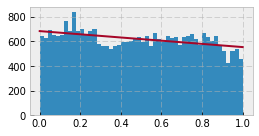

The Prose Works of N. P. Willis (Nathaniel Willis, 1849)
-70.1952941176 0.00386756769486


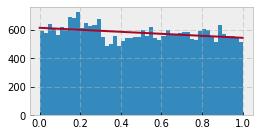

Lonesome dove (Larry McMurtry, 1985)
-62.5552941176 4.34110812403e-09


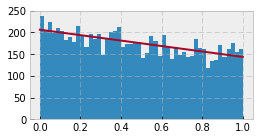

An American tragedy (Theodore Dreiser, 1925)
-58.2870588235 1.29789837891e-06


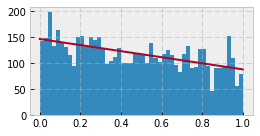

Some came running (James Jones, 1957)
-58.2023529412 1.62899961773e-08


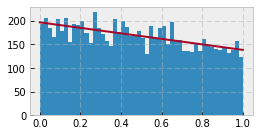

And the sea will tell (Vincent Bugliosi, 1991)
-56.9929411765 2.12552788831e-07


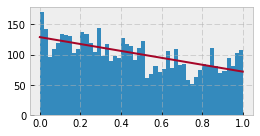

Pillars of the earth (Ken Follett, 1989)
-53.2305882353 4.20533276444e-05


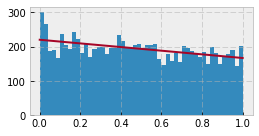

The Works of Washington Irving (Washington Irving, 1840)
-51.9317647059 0.00986365744606


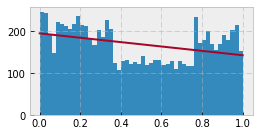

Assassin's quest (Margaret Astrid Lindholm Ogden, 1997)
-50.4094117647 6.45434356876e-06


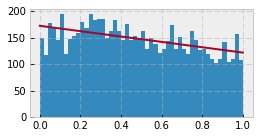

New York: A Symphonic Study, in Three Parts: By Melusina Fay Peirce (Fay Peirce, 1918)
-49.8305882353 1.84907430243e-08


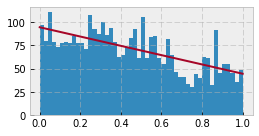

An Iron Crown: A Tale of the Great Republic..: Thomas Stewart Denison (Thomas Denison, 1855)
-48.4141176471 1.01283782621e-08


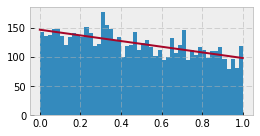

The judge (Rebecca West, 1922)
-46.8729411765 7.67337204449e-10


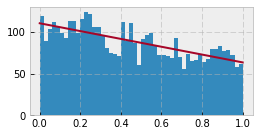

The gates of the Alamo (Stephen Harrigan, 2000)
-44.9976470588 3.99270673269e-08


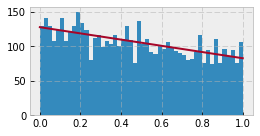

A prologue to love (Taylor Caldwell, 1961)
-44.1317647059 1.43042466993e-06


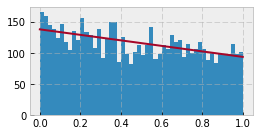

The naked and the dead (Norman Mailer, 1948)
-43.8823529412 9.9557434179e-07


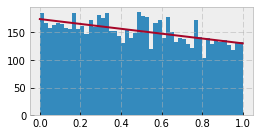

The memoirs of Cleopatra (Margaret George, 1997)
-43.7435294118 2.29256267539e-05


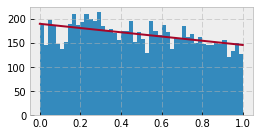

The bear and the dragon (Tom Clancy, 2000)
-42.8752941176 1.23429429117e-06


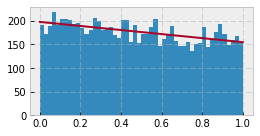

Executive orders (Tom Clancy, 1996)
-42.1882352941 1.09800887437e-05


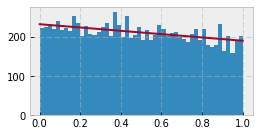

Moby-Dick: Or, the Whale..: Herman Melville (Herman Melville, 1851)
-40.8564705882 2.40527599771e-05


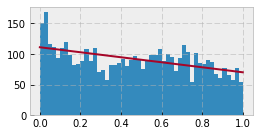

The Quincunx (Charles Palliser, 1990)
-40.6870588235 0.00145783212478


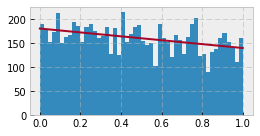

The Genius (Theodore Dreiser, 1925)
-40.6235294118 0.000324743804447


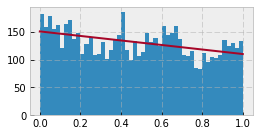

A Big Horse to Ride: By E. B. Dewing (Elizabeth Kaup, 1911)
-40.1035294118 2.50129013697e-10


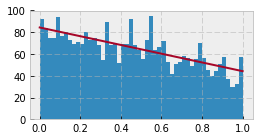

Roderick Hudson (Henry James, 1882)
-39.7647058824 1.0892230683e-09


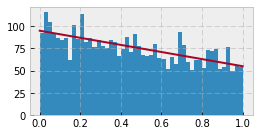

Everybody's Friend, or, Josh Billing's Encyclopedia and Proverbial Philosophy of Wit and Humor: Profusely Illustrated by Thomas Nast and Other Artists … (Josh Billings, 1874)
-39.6588235294 2.69196532956e-05


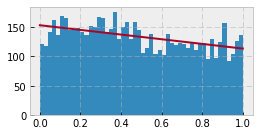

Roderick Hudson: By Henry James, Jr. (Henry James, 1876)
-38.9341176471 4.59456025577e-09


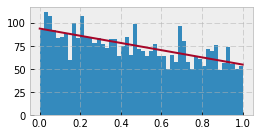

Finnegans wake (James Joyce, 1939)
-38.9270588235 1.37227893626e-05


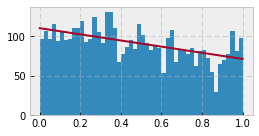

Genuine lies (Nora Roberts, 1998)
-38.0376470588 9.96201132027e-08


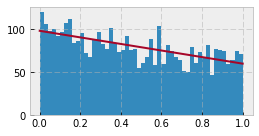

The Sunny Land, or, Prison Prose and Poetry: Containing the Productions of the Ablest Writers in the South, and Prison Lays of Distinguished Confederate Officers: By Col. Buehring H. Jones... Edited, with Preface, Biographies, Sketches, and Stories, by J. A. Houston … (Buehring Jones, 1868)
-37.8164705882 6.18218249611e-08


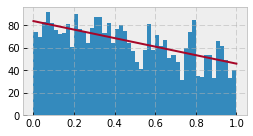

Guardians of the flame (Joel Rosenberg, 1985)
-37.4423529412 5.45500720254e-06


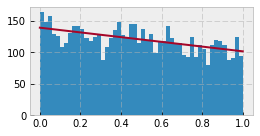

House of all nations (Christina Stead, 1938)
-37.1411764706 4.59077424901e-05


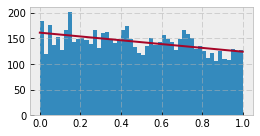

Ancient evenings (Norman Mailer, 1983)
-36.6635294118 0.000307637914225


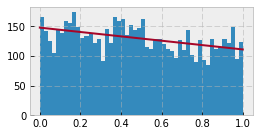

The court of the lion (Eleanor Cooney, 1989)
-36.4423529412 8.66492242318e-05


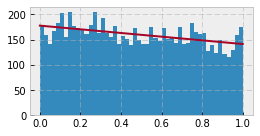

Lucifer's hammer (Larry Niven, 1977)
-35.8541176471 1.95765338374e-06


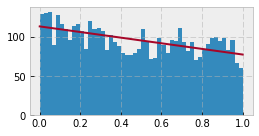

Part 35 (John Nicholas Iannuzzi, 1970)
-35.7576470588 2.1397640781e-05


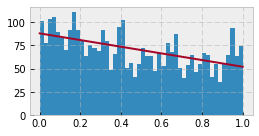

Soldier's joy (Madison Smartt Bell, 1989)
-35.6894117647 1.51272493143e-05


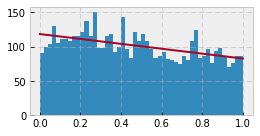

The stand (Stephen King, 1978)
-35.0423529412 0.00184067030133


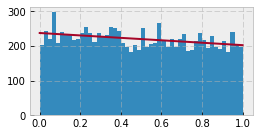

The mists of Avalon (Marion Zimmer Bradley, 1982)
-34.9552941176 0.000295894242647


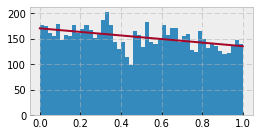

Forever Amber (Kathleen Winsor, 1944)
-34.9011764706 6.32473337247e-05


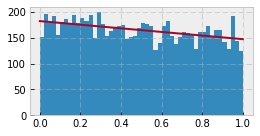

Cromm (Kenneth C Flint, 1990)
-34.56 5.77253356194e-06


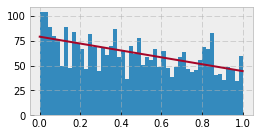

Drums of autumn (Diana Gabaldon, 1997)
-34.3058823529 0.000349806500529


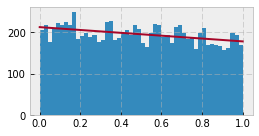

Penhallow (Georgette Heyer, 1943)
-34.1388235294 2.75351046142e-10


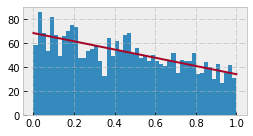

The Price She Paid: A Novel: By Frank Lee Benedict (Frank Benedict, 1883)
-34.0917647059 3.30623622238e-09


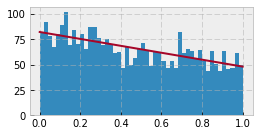

Clockers (Richard Price, 1992)
-33.9741176471 3.45132317337e-05


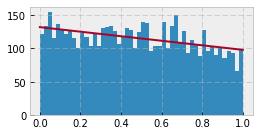

The Mayor of New York: A Romance of Days to Come: By L. P. Gratacap… (Louis Gratacap, 1910)
-33.6541176471 2.07751487221e-06


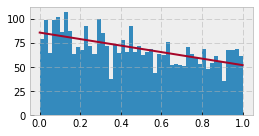

Hollywood kids (Jackie Collins, 1994)
-33.1647058824 5.17109717692e-07


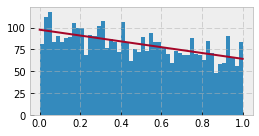

Romance of the Charter Oak: A Picture of Colonial Times..: William Seton (William Seton, 1871)
-33.1482352941 1.3031038735e-07


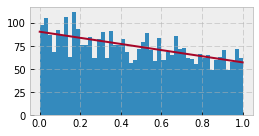

Miss Hogg, the American Heiress: A Novel: By V. C. Jones (Victorine Jones, 1900)
-33.1294117647 3.6075299807e-06


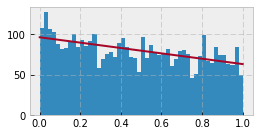

Obsidian butterfly (Laurell K Klein, 2000)
-32.9717647059 5.56677607197e-06


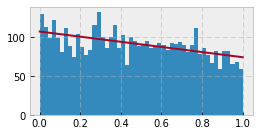

The Illini: A Story of the Prairies: By Clark E. Carr, with Twenty Full-Page Portraits… (Clark Carr, 1904)
-32.8423529412 1.98413089971e-08


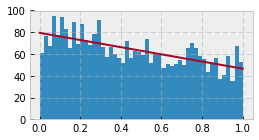

Rebecca (Daphne Du Maurier, 1938)
-32.7670588235 6.51866761051e-06


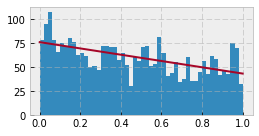

In [10]:
for text in down['text'][:50]:
    plot_histogram(text)

# Increasing

A Scots quair (James Leslie Mitchell, 1946)
44.3764705882 0.000121833785003


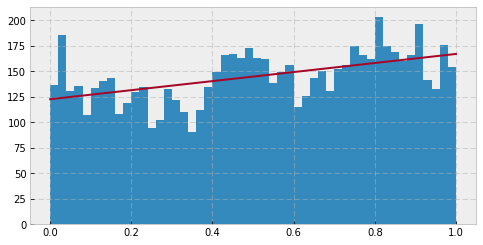

The golden key (Melanie Rawn, 1996)
38.7270588235 0.00040862439135


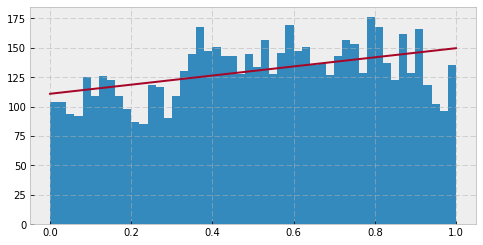

A Basket of Chips: John Brougham (John Brougham, 1866)
38.6164705882 8.51250151599e-09


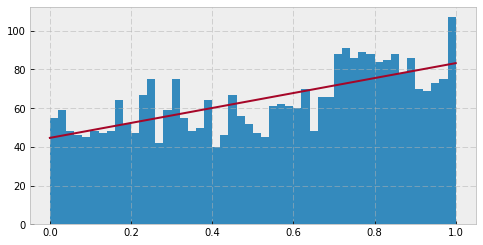

How green was my valley (Richard Llewellyn, 1939)
35.2352941176 4.59491563046e-08


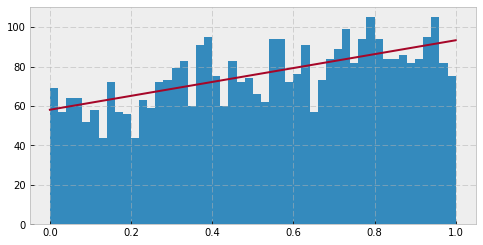

The Man of Mt. Moriah: A Great Masonic Serial: By Clarence Miles Boutelle (Clarence Boutelle, 1898)
32.04 2.95672861871e-05


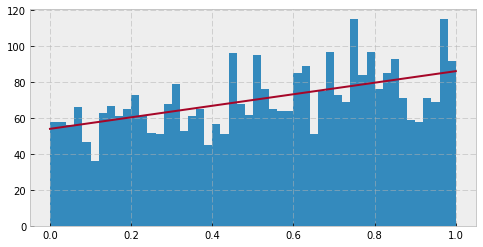

Recreations of a Psychologist: By G. Stanley Hall (Granville Hall, 1920)
31.2847058824 8.32421882598e-06


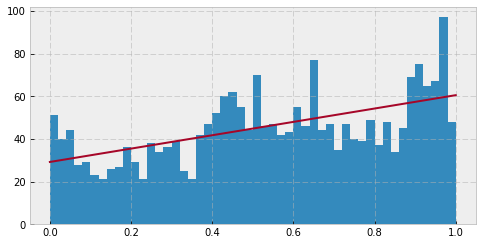

Cape Cod (William Martin, 1991)
24.3505882353 0.00224078741841


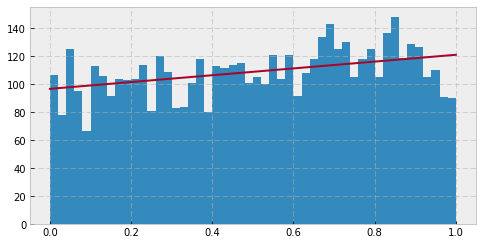

Poems and Prose Writings: Richard Henry Dana (Richard Dana, 1833)
23.4964705882 0.000581796537273


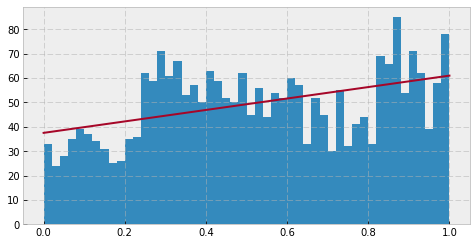

Trust (Cynthia Ozick, 1966)
22.7176470588 0.00434404000458


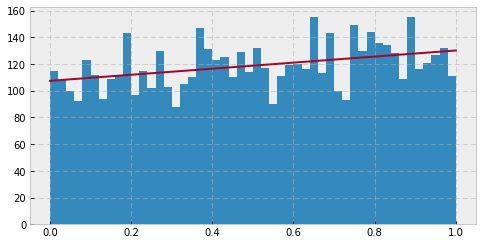

Bill Arp's Peace Papers: With Illustrations by Matt O'Brian … (Bill Arp, 1873)
22.3929411765 6.2745174125e-09


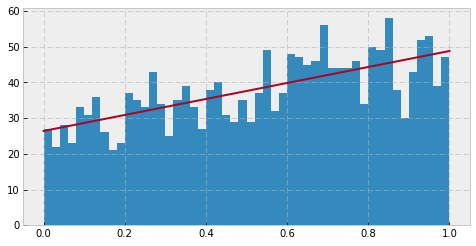

The sound and the fury (William Faulkner, 1929)
22.3411764706 0.00179441628682


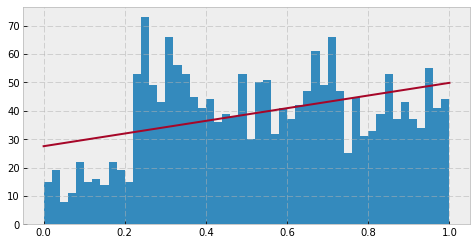

The Quaker City: Or, the Monks of Monk-Hall: A Romance of Philadelphia Life, Mystery, and Crime: George Lippard (George Lippard, 1845)
22.0541176471 0.00231929209003


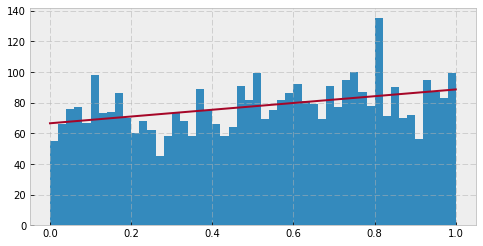

The Works of the Late Edgar Allan Poe: With Notices of His Life and Genius: By N. P. Willis, J. R. Lowell, and, R. W. Griswold (Edgar Poe, 1850)
21.6164705882 0.00154948037029


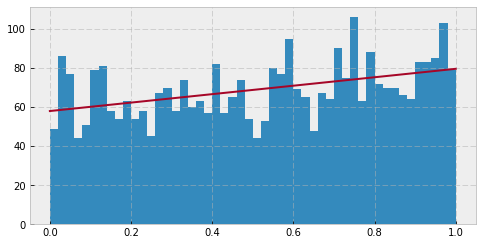

"Chimmie Fadden": Major Max: And Other Stories: By Edward W. Townsend … (Edward Townsend, 1895)
21.3858823529 4.64181207308e-05


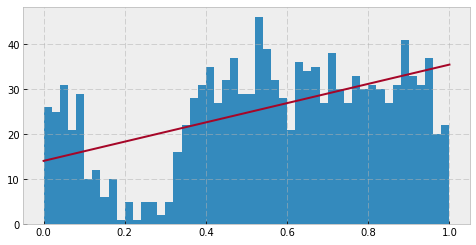

Duet (Kitty Burns Florey, 1987)
20.9247058824 0.000858449644842


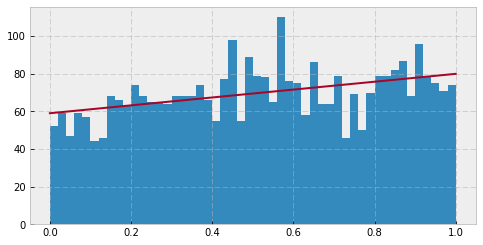

Mary Poppins (P. L. Travers, 1947)
19.6517647059 0.00121130450778


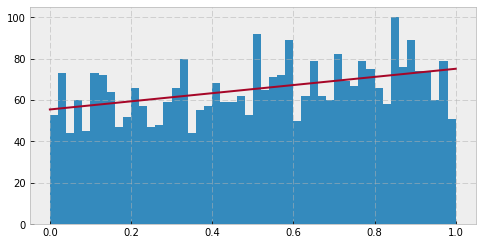

The breath of kings (Gene Farrington, 1982)
18.5811764706 0.00363668428269


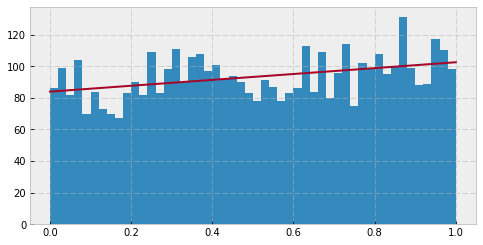

The king in yellow (Robert W. Chambers, 1895)
18.2682352941 3.94360018285e-06


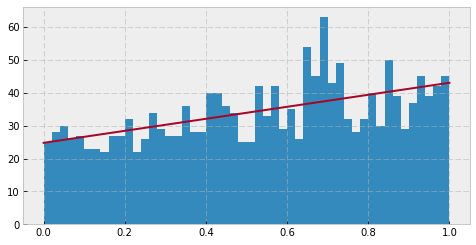

The Seventh Person: By Benjamin Brace (Benjamin Brace, 1906)
18.1788235294 1.17967405889e-05


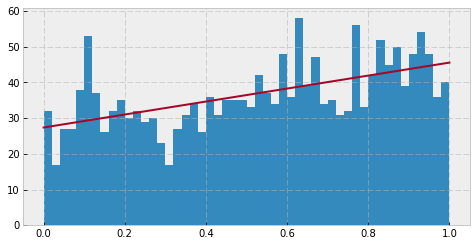

Coupon Bonds, and Other Stories: By J. T. Trowbridge; with Illustrations (John Trowbridge, 1873)
18.1482352941 0.00361719524334


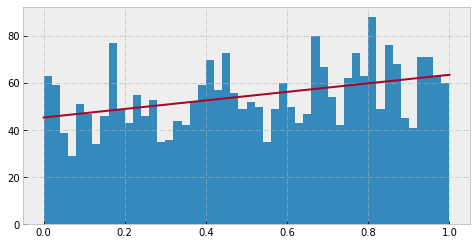

The Bride of Llewellyn: By Emma D. E. N. Southworth (Emma Southworth, 1875)
17.9082352941 0.00256952991194


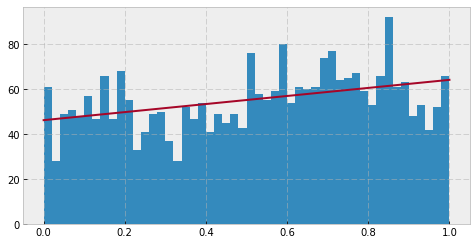

Recollections of the Old Quarter: By Wm. S. Gordon (William Gordon, 1902)
17.2164705882 8.29063954246e-05


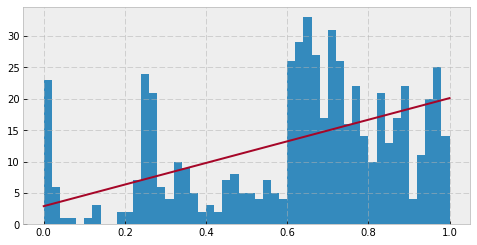

The King in Yellow: By Robert W. Chambers … (Robert Chambers, 1895)
17.1811764706 1.20643300039e-05


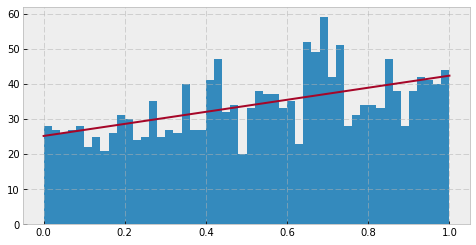

Wolf willow (Wallace Stegner, 1962)
16.5882352941 0.00610973264207


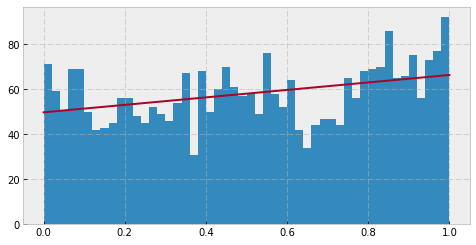

Western Characters, or, Types of Border Life in the Western States: By J. L. McConnel (John McConnel, 1853)
16.2023529412 7.51627997206e-05


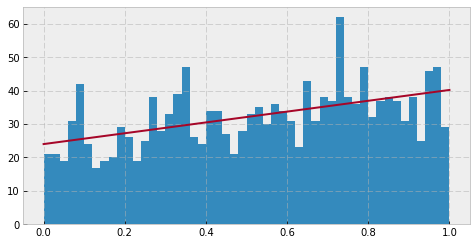

Matrimonial Infelicities: With an Occasional Felicity, by Way of Contrast: By an Irritable Man: To Which Are Added, as Being Pertinent to the Subject, My Neighbors, and down in the Valley: By Barry Gray (Barry Gray, 1865)
16.0541176471 6.51928360098e-05


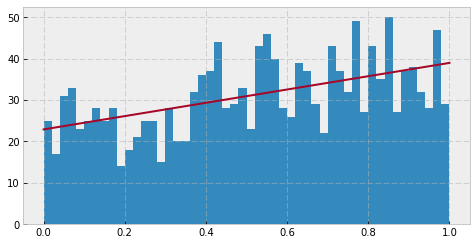

Dragon and phoenix (Joanne Bertin, 1999)
16.0376470588 0.0081301189736


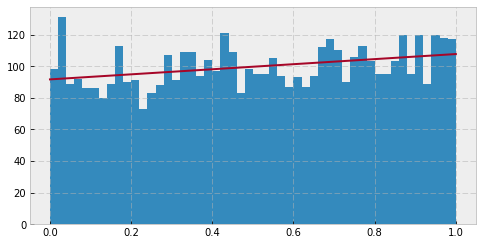

Ham on rye (Charles Bukowski, 1982)
15.9176470588 0.000452668110983


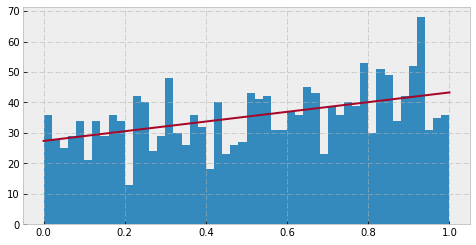

The lonely lady (Harold Robbins, 1976)
15.4494117647 0.000108122584533


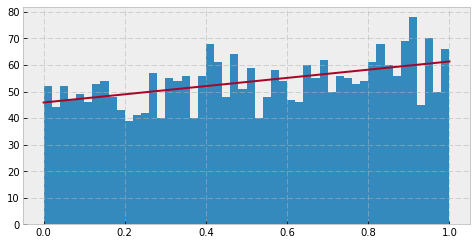

Cities of the red night (William S. Burroughs, 1981)
15.4023529412 0.00684729887016


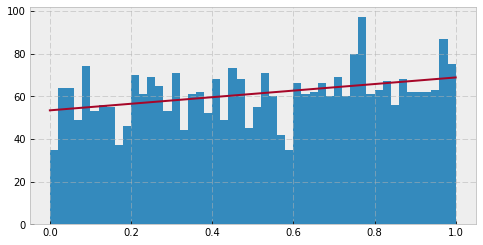

Fern Leaves from Fanny's Port-Folio: Sara Payson Willis Parton (Fanny Fern, 1853)
14.8517647059 0.000132975524839


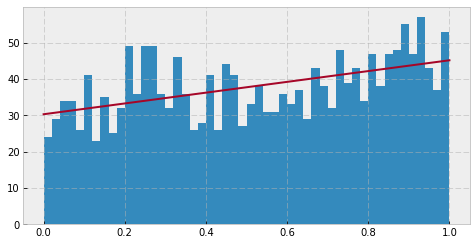

The Little Lady of Lagunitas: A Franco-Californian Romance: By Richard Henry Savage … (Richard Savage, 1892)
14.8423529412 0.00164524282206


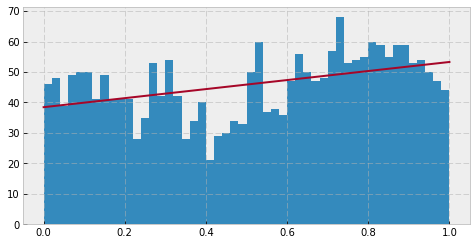

Forty-Four Years of the Life of a Hunter: Being Reminiscences of Meshach Browning, a Maryland Hunter: Written down by Himself; Rev. and Illustrated by E. Stabler (Meshach Browning, 1859)
14.8023529412 0.00232632828686


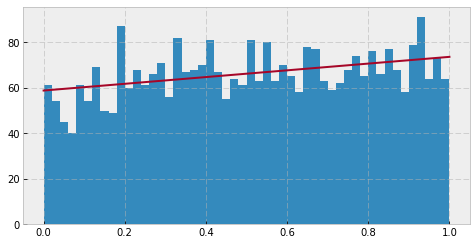

The Leisure Moments of Miss Martha Haines Butt: Martha Haines Bennett (Martha Bennett, 1860)
14.6376470588 0.00476330901889


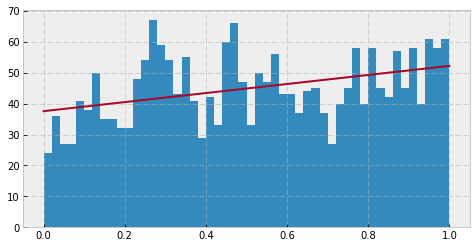

Men: women and boats (Stephen Crane, 1921)
14.6164705882 0.000221958518139


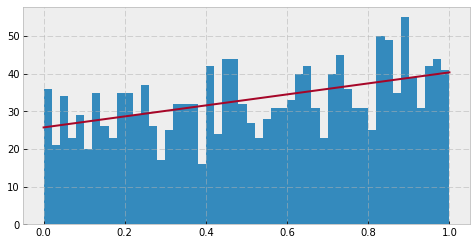

Mysterious Miss Dacres: Mrs. Schuyler Crowninshield (Schuyler Crowninshield, 1901)
14.5011764706 0.00025444509635


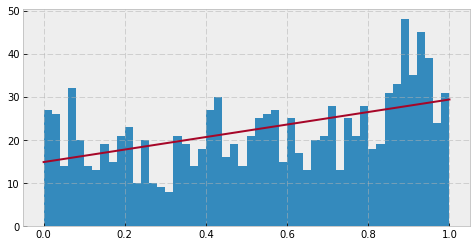

The Yankee Enterprise, or, the Two Millionaires: And Other Thrilling Tales (None None, 1855)
14.3482352941 0.00883509289178


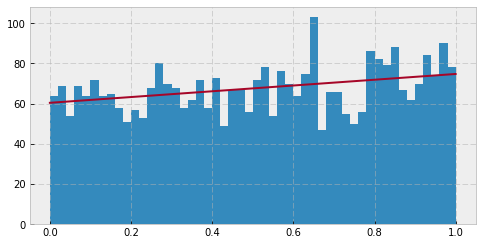

The little lady of Lagunitas (Richard Savage, 1892)
14.1105882353 0.00313527678433


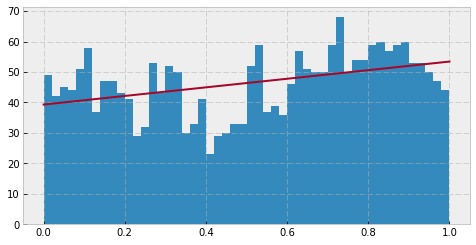

Persons and Pictures from the Histories of France and England: From the Norman Conquest to the Fall of the Stuarts: By Henry William Herbert … (Henry Herbert, 1854)
13.8894117647 0.00729922392745


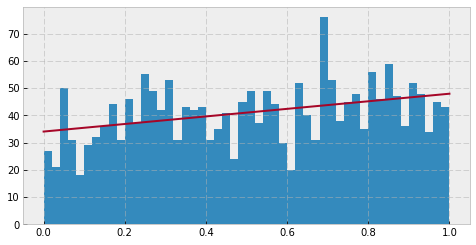

I'm losing you (Bruce Wagner, 1996)
13.8682352941 0.00794139918929


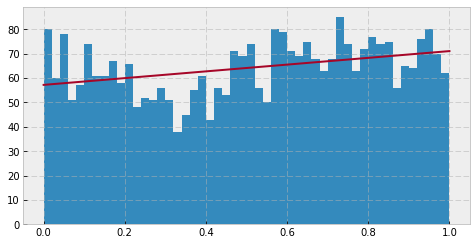

The danger mark (Robert W. Chambers, 1909)
13.7388235294 0.00189950571198


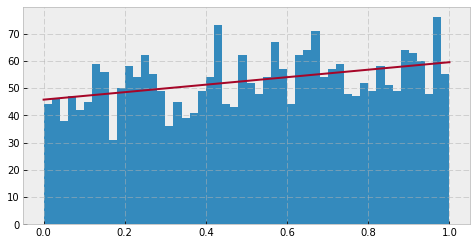

Coffee will make you black (April Sinclair, 1994)
13.7011764706 0.00059708669319


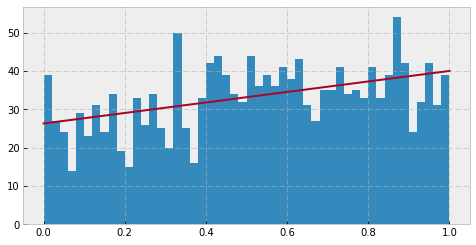

Life in Danbury: Being a Brief but Comprehensive Record of the Doings of a Remarkable People: By James M. Bailey (James Bailey, 1873)
13.6235294118 0.0017690964418


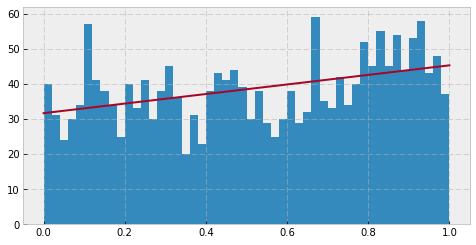

The Lay of the Land: A Collection of Short Stories: By Virginia Q. McNealus (Virginia McNealus, 1916)
13.5835294118 1.40601762886e-05


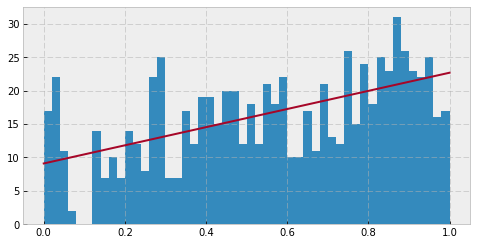

Tales of Glauber-Spa: By Several American Authors (William Bryant, 1832)
13.5435294118 0.000527634018915


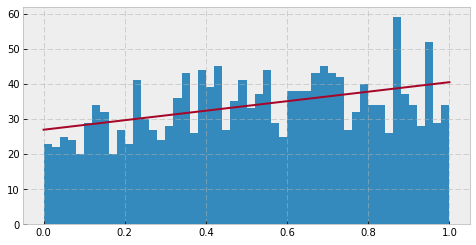

A servant's tale (Paula Fox, 1984)
13.5223529412 0.00854908369038


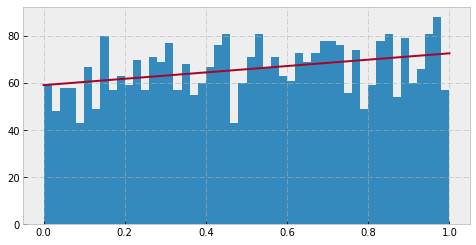

The Leopard's Spots: A Romance of the White Man's Burden--1865-1900: By Thomas Dixon; Illustrated by C. D. Williams (Thomas Dixon, 1902)
13.3929411765 0.00564530003722


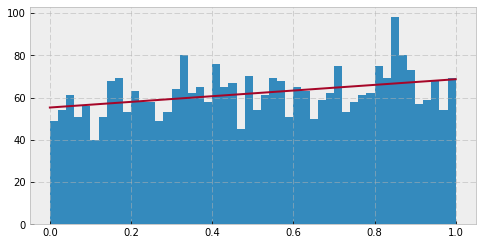

Beyond the veil of stars (Robert Reed, 1994)
13.36 0.00035361230332


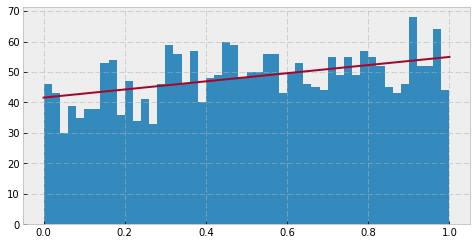

Corrected Proofs: By H. Hastings Weld (Horatio Weld, 1836)
13.2494117647 5.13141787473e-05


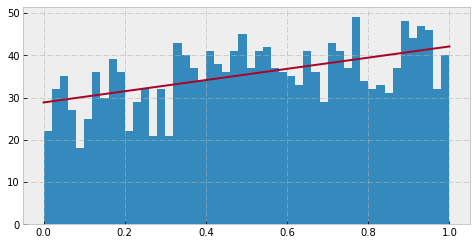

Tales of Terror, or, the Mysteries of Magic: A Selection of Wonderful and Supernatural Stories, Translated from the Chinese, Turkish, and German: Compiled by Henry St. Clair (Henry St. Clair, 1833)
13.0917647059 8.08574304242e-05


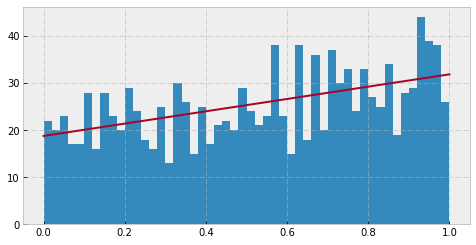

In [12]:
for text in up['text'][:50]:
    plot_histogram(text, w=8, h=4)